In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
baseball = pd.read_table('http://jse.amstat.org/datasets/baseball.dat.txt', header = None, 
                         sep= "\s+", names = ["salary", "batting.avg", "OBP","runs", "hits", "doubles", "triples", 
                                              "homeruns", "RBI", "walks", "strike.outs", "stolen.bases", "errors", "free.agency.elig", "free.agent.91", "arb.elig", "arb.91", "name"])

In [3]:
baseball.head()

,salary,batting.avg,OBP,runs,hits,doubles,triples,homeruns,RBI,walks,strike.outs,stolen.bases,errors,free.agency.elig,free.agent.91,arb.elig,arb.91,name
0,3300,0.272,0.302,69,153,21,4,31,104,22,80,4,3,1,0,0,0,Andre Dawson
1,2600,0.269,0.335,58,111,17,2,18,66,39,69,0,3,1,1,0,0,Steve Buchele
2,2500,0.249,0.337,54,115,15,1,17,73,63,116,6,5,1,0,0,0,Kal Daniels
3,2475,0.260,0.292,59,128,22,7,12,50,23,64,21,21,0,0,1,0,Shawon Dunston
4,2313,0.273,0.346,87,169,28,5,8,58,70,53,3,8,0,0,1,0,Mark Grace


# Q1 - Exploratory Data Analysis

__a)__

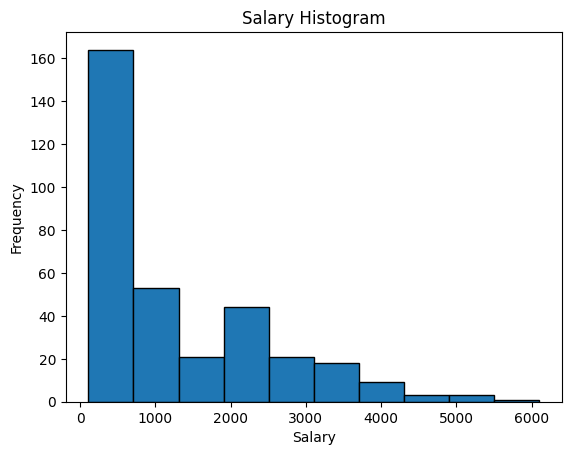

In [4]:
salaries = baseball['salary']
plt.hist(salaries, bins=10, edgecolor='k')
plt.title('Salary Histogram')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

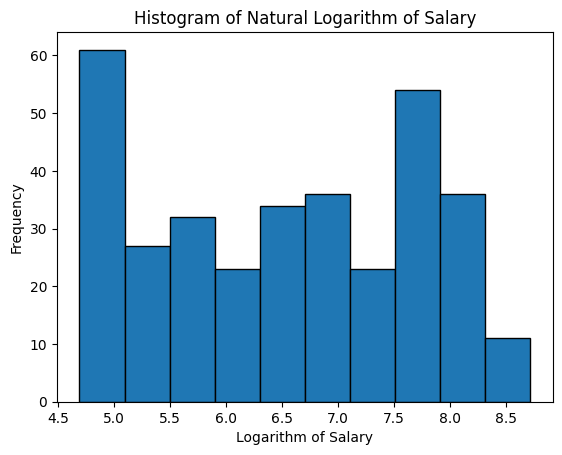

In [5]:
log_salaries = [np.log(salary) for salary in salaries]

plt.hist(log_salaries, bins=10, edgecolor='k')
plt.title('Histogram of Natural Logarithm of Salary')
plt.xlabel('Logarithm of Salary')
plt.ylabel('Frequency')
plt.show()

- The majority of salaries are of small amounts.
- The distribution of the salary is skewed to the right
- The distribution of the log-transformed salary is approximately normal.

__b)__

In [6]:
baseball['salary'] = log_salaries

In [7]:
baseball.isna().sum()

salary              0
batting.avg         0
OBP                 0
runs                0
hits                0
doubles             0
triples             0
homeruns            0
RBI                 0
walks               0
strike.outs         0
stolen.bases        0
errors              0
free.agency.elig    0
free.agent.91       0
arb.elig            0
arb.91              0
name                0
dtype: int64

__There are no any missing data__

In [8]:
baseball.dtypes

salary              float64
batting.avg         float64
OBP                 float64
runs                  int64
hits                  int64
doubles               int64
triples               int64
homeruns              int64
RBI                   int64
walks                 int64
strike.outs           int64
stolen.bases          int64
errors                int64
free.agency.elig      int64
free.agent.91         int64
arb.elig              int64
arb.91                int64
name                 object
dtype: object

In [9]:
len(list(baseball.select_dtypes('float'))) # number of float predictor

3

In [10]:
len(list(baseball.select_dtypes('int'))) # number of int predictor

14

In [11]:
len(list(baseball.select_dtypes('object'))) # number of object predictor

1

# Q2

__a__

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
D0,D1 = train_test_split(baseball, test_size=0.33, random_state=42)

In [14]:
D0_xtrain = D0.drop(columns=['salary','name'],axis=1)
D0_ytrain = D0['salary']

In [15]:
D1_xtest = D1.drop(columns=['salary','name'],axis=1)
D1_ytest = D1['salary']

In [16]:
X_train, X_test, y_train, y_test = D0_xtrain,D1_xtest,D0_ytrain,D1_ytest

__b__ , __c__ , __d__ and __e__

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error

In [18]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_predictions = lr.predict(X_test)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_predictions))

In [19]:
lr.coef_

array([-0.36969271, -1.0461816 , -0.00716147,  0.00816538, -0.00433332,
       -0.01289436,  0.00378515,  0.00998208,  0.0062583 , -0.00362073,
        0.00343273, -0.01189812,  1.70005274, -0.47649664,  1.36579804,
       -0.13711863])

In [20]:
lr.intercept_

5.314525330180657

In [21]:
# Lasso Regression (L1 Regularization)
lasso = Lasso(alpha=0.01)  # Adjust the alpha value as needed
lasso.fit(X_train, y_train)
lasso_predictions = lasso.predict(X_test)
lasso_rmse = mean_squared_error(y_test, lasso_predictions)

# Ridge Regression (L2 Regularization)
ridge = Ridge(alpha=0.01)  # Adjust the alpha value as needed
ridge.fit(X_train, y_train)
ridge_predictions = ridge.predict(X_test)
ridge_rmse = mean_squared_error(y_test, ridge_predictions)

# Elastic Net (L1 + L2 Regularization)
elastic_net = ElasticNet(alpha=0.01, l1_ratio=0.5)  # Adjust alpha and l1_ratio as needed
elastic_net.fit(X_train, y_train)
elastic_net_predictions = elastic_net.predict(X_test)
elastic_net_rmse = mean_squared_error(y_test, elastic_net_predictions)

# Compare the MSE of different models
print(f'Linear Regression MSE: {lr_rmse}')
print(f'Lasso Regression MSE: {lasso_rmse}')
print(f'Ridge Regression MSE: {ridge_rmse}')
print(f'Elastic Net MSE: {elastic_net_rmse}')

Linear Regression MSE: 0.5871109361189645
Lasso Regression MSE: 0.32510929714762565
Ridge Regression MSE: 0.34476688544175565
Elastic Net MSE: 0.32765837225001526


In [22]:
lasso.coef_

array([-0.        , -0.        , -0.00686979,  0.00759917, -0.00279971,
       -0.0067823 ,  0.00521737,  0.00991726,  0.00518611, -0.00319729,
        0.00342705, -0.01180533,  1.55569973, -0.28110256,  1.23202657,
       -0.        ])

In [23]:
lasso.intercept_

4.940057287589946

In [24]:
ridge.coef_

array([-0.43833123, -0.96129137, -0.00717755,  0.00819775, -0.00433032,
       -0.01289592,  0.00378287,  0.00999006,  0.00615041, -0.00360893,
        0.00343329, -0.01190042,  1.6991871 , -0.47556223,  1.36508247,
       -0.13693265])

In [25]:
ridge.intercept_

5.30556181857615

In [26]:
elastic_net.intercept_

4.9465840207523275

In [27]:
elastic_net.coef_

array([-0.        , -0.        , -0.00704061,  0.00788612, -0.00340598,
       -0.00841996,  0.00524117,  0.00991467,  0.00521417, -0.00322217,
        0.00351322, -0.01191242,  1.5458611 , -0.31358354,  1.21533817,
       -0.        ])

# Q3

In [28]:
best_model = lasso # since its having lowest MSE

In [29]:
X_full = pd.concat([X_train,X_test])
y_full = pd.concat([y_train,y_test])

In [30]:
best_model.fit(X_full, y_full)

Lasso(alpha=0.01)

In [31]:
lasso.coef_

array([-0.00000000e+00, -0.00000000e+00,  5.93976754e-04,  5.42565702e-03,
       -1.68567547e-03, -1.45340161e-02,  5.64885284e-03,  9.84469800e-03,
        2.99658311e-03, -4.96829997e-03,  4.79831399e-03, -8.18904734e-03,
        1.44111662e+00, -7.50010250e-02,  1.19043959e+00, -0.00000000e+00])

In [32]:
lasso.intercept_

4.980052952609238

These arrays essentially tell you which features are retained (non-zero coefficients) and which features are removed (zero coefficients) by the Lasso regularization. It also reflects feature selection (shrinkage to zero) .The magnitude of the coefficient values also gives you an idea of the relative importance of each retained feature. Features with larger non-zero coefficients have a more significant impact on predictions.

# Q4

In [41]:
# Load the test dataset
test_data = pd.read_csv('bb92-test-2.csv')
X_test = test_data
# X_test = test_data.drop(columns=['salary','name'],axis=1)

# Predict logsalary for the test dataset
y_pred_logsalary = best_model.predict(X_test)

# Transform the predicted logsalary back to regular salary values
y_pred_salary = np.exp(y_pred_logsalary)

# # Plot an error bar plot
# players = test_data['name'].tolist()
# actual_salary = test_data['salary'].tolist()

# # Calculate the errors
# errors = np.abs(actual_salary - y_pred_salary)

# plt.figure(figsize=(12, 6))
# plt.bar(players, y_pred_salary, yerr=errors, capsize=5)
# plt.xlabel('Players Name')
# plt.ylabel('Predicted Salary')
# plt.title('Predicted Salary with Error Bars')
# plt.xticks(rotation=90)
# plt.tight_layout()

# plt.show()

In [42]:
y_pred_salary

array([ 193.99277644,  738.11004372, 1491.73645601,  296.90770536,
        256.62626939,  840.09070692,  514.77584356,  464.44296128,
        676.73154474, 1218.90520414,  901.32430878,  667.18192992,
       2808.4470334 ,  214.17797688,  494.88745716, 1760.35009755,
       1031.35996575, 1267.94012992,  418.92321365,  264.29136747])